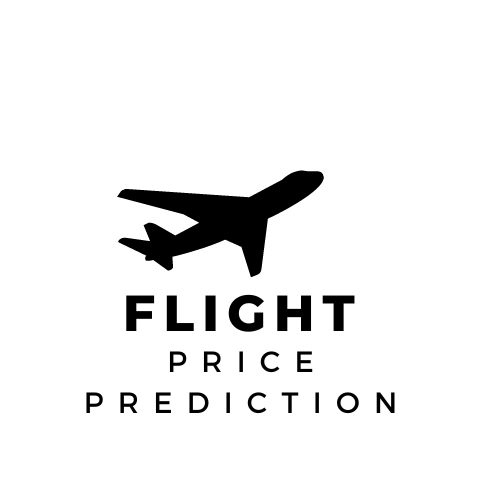

<div style="background-color: orange; padding: 10px; text-align: center;">
    
<h1 style="font-weight: bold; font-style: italic;">Problem Statement</h1>
    
</div>



###  Client had a problem in predicting the price of ticket for a flight



<div style="background-color: orange; padding: 10px; text-align: center;">
    
<h1 style="font-weight: bold; font-style: italic;">Data Gathering and Validation</h1>
    
</div>




#### The objective of the case study is to analyse the flight booking dataset obtained from “Ease My Trip” website and to conduct various statistical hypothesis tests in order to get meaningful information from it. 'Easemytrip' is an internet platform for booking flight tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers. Overall, I have to build a model that can precisely predict the ticket price.

<div style="background-color: orange; padding: 10px; text-align: center;">
    
<h1 style="font-weight: bold; font-style: italic;">Brain Storming</h1>
    
</div>



##### By getting problem of the client, i have some questions in my mind, which are follow

##### a) Does price vary with Airlines?

##### b) How is the price affected when tickets are bought in just 1 or 2 days before departure?

##### c) Does ticket price change based on the departure time and arrival time?

##### d) How the price changes with change in Source and Destination?

##### e) How does the ticket price vary between Economy and Business class?, etc

#### Data is seperated in to two parts:
##### one for economy class tickets and another for business class tickets.

##### A total of 300261 distinct flight booking options are available. And these are for 50 days, from February 11th to March 31st, 2022.

In [72]:
import pandas as pd
import numpy as np
import json
import pickle
import warnings 
warnings.filterwarnings("ignore")
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,mean_absolute_percentage_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor, \
GradientBoostingRegressor, BaggingRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor
from sklearn.svm import LinearSVR
import IPython


<div style="background-color: orange; padding: 10px; text-align: center;">
    
<h1 style="font-weight: bold; font-style: italic;">Loading The Files in Dataframes</h1>
    
</div>


In [2]:
df_bus=pd.read_csv('business.csv')

In [3]:
df_bus.head(5)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"


In [4]:
df_ec=pd.read_csv('economy.csv')

In [5]:
df_ec.head(5)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"


<div style="background-color: orange; padding: 10px; text-align: center;">
    
<h1 style="font-weight: bold; font-style: italic;">Initial Preprocessing</h1>
    
</div>

#### as we can see the there is high noise in the data. So, we will do some cleaning and also drive some relevent featues from the given data

#### we will drive new featue named class to specify in which class the ticket is booked

#### we wil drive new featute named flight by adding ch_code and num_code of the flight

#### we will drive new feature days left by subtracting the booking date from journey date

In [6]:
df_bus["class"] = "business"
df_ec["class"] = "economy"

In [7]:
df_bus

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612",business
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612",business
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220",business
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450",business
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690",business
...,...,...,...,...,...,...,...,...,...,...,...,...
93482,31-03-2022,Vistara,UK,822,09:45,Chennai,10h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:50,Hyderabad,"69,265",business
93483,31-03-2022,Vistara,UK,826,12:30,Chennai,10h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:55,Hyderabad,"77,105",business
93484,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"79,099",business
93485,31-03-2022,Vistara,UK,828,07:00,Chennai,10h 00m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,17:00,Hyderabad,"81,585",business


In [8]:
# appending two data sets and storing in the new data frame
df=df_ec.append(df_bus,ignore_index = True) 
df.head(50)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",economy
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",economy
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",economy
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",economy
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",economy
5,11-02-2022,Vistara,UK,945,11:40,Delhi,02h 20m,non-stop,14:00,Mumbai,"5,955",economy
6,11-02-2022,Vistara,UK,927,09:30,Delhi,02h 05m,non-stop,11:35,Mumbai,"6,060",economy
7,11-02-2022,Vistara,UK,951,14:20,Delhi,02h 10m,non-stop,16:30,Mumbai,"6,060",economy
8,11-02-2022,GO FIRST,G8,334,08:00,Delhi,02h 10m,non-stop,10:10,Mumbai,"5,954",economy
9,11-02-2022,GO FIRST,G8,336,14:20,Delhi,02h 15m,non-stop,16:35,Mumbai,"5,954",economy


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300261 entries, 0 to 300260
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        300261 non-null  object
 1   airline     300261 non-null  object
 2   ch_code     300261 non-null  object
 3   num_code    300261 non-null  int64 
 4   dep_time    300261 non-null  object
 5   from        300261 non-null  object
 6   time_taken  300261 non-null  object
 7   stop        300261 non-null  object
 8   arr_time    300261 non-null  object
 9   to          300261 non-null  object
 10  price       300261 non-null  object
 11  class       300261 non-null  object
dtypes: int64(1), object(11)
memory usage: 27.5+ MB


In [10]:
# merging two columns (ch_code and "num_code") and making new feature flight
df.num_code = df.num_code.astype("str")
df["flight"] = df["ch_code"] +"-"+ df["num_code"]
df.drop(["ch_code","num_code"],axis = 1,inplace = True)

In [11]:
# renaming the featuers
df.rename({"dep_time": "departure_time", "from": "source_city", 
            "time_taken": "duration", "stop": "stops", "arr_time": "arrival_time",
           "to":"destination_city"}, axis = 1, inplace = True)

In [12]:
dd = pd.DataFrame(df["date"].str.split("-",expand = True).to_numpy().astype(int),columns = ["day","month","year"])
df["days_left"] = np.where(dd["month"] > 2, dd["day"] +18, np.where(dd["month"] == 2, dd["day"] -10, dd["day"]))

In [13]:
df['date'] = pd.to_datetime(df['date'])

In [14]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [15]:
# as we drived one feature on the basis of date so no need for this featue so we will drop it
df.drop("date",axis = 1,inplace = True)


In [16]:
# converting time into morning/noon/evening, etc
d=(pd.to_datetime(df["departure_time"]).dt.hour % 24 + 4)//4
d.replace({1:'Late Night', 2:'Early Morning',3:'Morning',4:'Afternoon',5:'Evening',6:'Night'},inplace=True)
df['departure_time']=d


In [17]:
df.head(5)

,airline,departure_time,source_city,duration,stops,arrival_time,destination_city,price,class,flight,days_left,year,month,day
0,SpiceJet,Evening,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",economy,SG-8709,1,2022,11,2
1,SpiceJet,Early Morning,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",economy,SG-8157,1,2022,11,2
2,AirAsia,Early Morning,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",economy,I5-764,1,2022,11,2
3,Vistara,Morning,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",economy,UK-995,1,2022,11,2
4,Vistara,Morning,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",economy,UK-963,1,2022,11,2


In [18]:
# we also can get morning eveniing categories by making bins
#  our bins are (0,4,8,12,16,20,24) respected labels starts from "latenight" to "night"
temp = pd.DataFrame(df["arrival_time"].str.split(":",expand = True).to_numpy().astype(int), 
                    columns = ["hour","minute"])
df["arrival_time"] = pd.cut(x = temp["hour"], bins = 6, labels = 
                             ["Late Night","Early Morning","Morning", "Afternoon", "Evening", "Night"])
df.head(1)

,airline,departure_time,source_city,duration,stops,arrival_time,destination_city,price,class,flight,days_left,year,month,day
0,SpiceJet,Evening,Delhi,02h 10m,non-stop,Night,Mumbai,"5,953",economy,SG-8709,1,2022,11,2


In [19]:
df

,airline,departure_time,source_city,duration,stops,arrival_time,destination_city,price,class,flight,days_left,year,month,day
0,SpiceJet,Evening,Delhi,02h 10m,non-stop,Night,Mumbai,"5,953",economy,SG-8709,1,2022,11,2
1,SpiceJet,Early Morning,Delhi,02h 20m,non-stop,Morning,Mumbai,"5,953",economy,SG-8157,1,2022,11,2
2,AirAsia,Early Morning,Delhi,02h 10m,non-stop,Early Morning,Mumbai,"5,956",economy,I5-764,1,2022,11,2
3,Vistara,Morning,Delhi,02h 15m,non-stop,Afternoon,Mumbai,"5,955",economy,UK-995,1,2022,11,2
4,Vistara,Morning,Delhi,02h 20m,non-stop,Morning,Mumbai,"5,955",economy,UK-963,1,2022,11,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300256,Vistara,Morning,Chennai,10h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Evening,Hyderabad,"69,265",business,UK-822,49,2022,3,31
300257,Vistara,Afternoon,Chennai,10h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Night,Hyderabad,"77,105",business,UK-826,49,2022,3,31
300258,Vistara,Early Morning,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Night,Hyderabad,"79,099",business,UK-832,49,2022,3,31
300259,Vistara,Early Morning,Chennai,10h 00m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Evening,Hyderabad,"81,585",business,UK-828,49,2022,3,31


In [20]:
# making duration in float values by calculating only hours
temp = pd.DataFrame(df["duration"].str.split(expand = True).to_numpy().astype(str), 
                    columns = ["hour","minute"])
temp["hour"] = temp["hour"].apply(lambda x: re.sub("[^0-9]","",x)).astype(int)
temp["minute"] = temp["minute"].apply(lambda r: re.sub("[^0-9]","",r))
temp["minute"] = np.where(temp["minute"] == "", 0, temp["minute"])
temp["minute"] = temp["minute"].astype(int)
df["duration"] = np.around((temp["hour"] + (temp["minute"]/60)),2)

In [21]:
df.head(5)

,airline,departure_time,source_city,duration,stops,arrival_time,destination_city,price,class,flight,days_left,year,month,day
0,SpiceJet,Evening,Delhi,2.17,non-stop,Night,Mumbai,"5,953",economy,SG-8709,1,2022,11,2
1,SpiceJet,Early Morning,Delhi,2.33,non-stop,Morning,Mumbai,"5,953",economy,SG-8157,1,2022,11,2
2,AirAsia,Early Morning,Delhi,2.17,non-stop,Early Morning,Mumbai,"5,956",economy,I5-764,1,2022,11,2
3,Vistara,Morning,Delhi,2.25,non-stop,Afternoon,Mumbai,"5,955",economy,UK-995,1,2022,11,2
4,Vistara,Morning,Delhi,2.33,non-stop,Morning,Mumbai,"5,955",economy,UK-963,1,2022,11,2


In [22]:
# # removing noise from price column
df["price"] = df["price"].apply(lambda r: re.sub("[^0-9]","",r)) 

In [23]:
df["price"] = df["price"].astype(int)

In [24]:
df.head(50)

,airline,departure_time,source_city,duration,stops,arrival_time,destination_city,price,class,flight,days_left,year,month,day
0,SpiceJet,Evening,Delhi,2.17,non-stop,Night,Mumbai,5953,economy,SG-8709,1,2022,11,2
1,SpiceJet,Early Morning,Delhi,2.33,non-stop,Morning,Mumbai,5953,economy,SG-8157,1,2022,11,2
2,AirAsia,Early Morning,Delhi,2.17,non-stop,Early Morning,Mumbai,5956,economy,I5-764,1,2022,11,2
3,Vistara,Morning,Delhi,2.25,non-stop,Afternoon,Mumbai,5955,economy,UK-995,1,2022,11,2
4,Vistara,Morning,Delhi,2.33,non-stop,Morning,Mumbai,5955,economy,UK-963,1,2022,11,2
5,Vistara,Morning,Delhi,2.33,non-stop,Afternoon,Mumbai,5955,economy,UK-945,1,2022,11,2
6,Vistara,Morning,Delhi,2.08,non-stop,Morning,Mumbai,6060,economy,UK-927,1,2022,11,2
7,Vistara,Afternoon,Delhi,2.17,non-stop,Evening,Mumbai,6060,economy,UK-951,1,2022,11,2
8,GO FIRST,Morning,Delhi,2.17,non-stop,Morning,Mumbai,5954,economy,G8-334,1,2022,11,2
9,GO FIRST,Afternoon,Delhi,2.25,non-stop,Evening,Mumbai,5954,economy,G8-336,1,2022,11,2


In [25]:
df.stops.unique()


array(['non-stop ',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Chennai\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Indore\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia RPR\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '2+-stop',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Lucknow\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia GOP\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Raipur\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Nagpur\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Surat\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Hyderabad\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia STV\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t

In [26]:
# making the stops in numeric data type by giving stops accordingly
df['stops'] = df['stops'].str.replace(r'\W', "")

In [27]:
df.stops.unique()

array(['nonstop', '1stop', '1stopViaIXU', '1stopViaChennai',
       '1stopViaIndore', '1stopViaRPR', '2stop', '1stopViaLucknow',
       '1stopViaGOP', '1stopViaRaipur', '1stopViaNagpur', '1stopViaSurat',
       '1stopViaHyderabad', '1stopViaSTV', '1stopViaIDR', '1stopViaVTZ',
       '1stopViaGuwahati', '1stopViaNAG', '1stopViaVishakhapatnam',
       '1stopViaNDC', '1stopViaIXE', '1stopViaPatna', '1stopViaPAT',
       '1stopViaMangalore', '1stopViaMumbai', '1stopViaKLH',
       '1stopViaMYQ', '1stopViaKolkata', '1stopViaDelhi',
       '1stopViaKolhapur', '1stopViaJRG', '1stopViaBhubaneswar',
       '1stopViaRanchi', '1stopViaIXR', '1stopViaJGB', '1stopViaBBI',
       '1stopViaMysore', '1stopViaGAY', '1stopViaGAU', '1stopViaHYD'],
      dtype=object)

In [28]:
df.stops.replace({'nonstop':'0'}, inplace=True)
df.stops.unique()

array(['0', '1stop', '1stopViaIXU', '1stopViaChennai', '1stopViaIndore',
       '1stopViaRPR', '2stop', '1stopViaLucknow', '1stopViaGOP',
       '1stopViaRaipur', '1stopViaNagpur', '1stopViaSurat',
       '1stopViaHyderabad', '1stopViaSTV', '1stopViaIDR', '1stopViaVTZ',
       '1stopViaGuwahati', '1stopViaNAG', '1stopViaVishakhapatnam',
       '1stopViaNDC', '1stopViaIXE', '1stopViaPatna', '1stopViaPAT',
       '1stopViaMangalore', '1stopViaMumbai', '1stopViaKLH',
       '1stopViaMYQ', '1stopViaKolkata', '1stopViaDelhi',
       '1stopViaKolhapur', '1stopViaJRG', '1stopViaBhubaneswar',
       '1stopViaRanchi', '1stopViaIXR', '1stopViaJGB', '1stopViaBBI',
       '1stopViaMysore', '1stopViaGAY', '1stopViaGAU', '1stopViaHYD'],
      dtype=object)

In [29]:
df["stops"] = df["stops"].str.replace(r'\D', "")

In [30]:
df.stops.unique()

array(['0', '1', '2'], dtype=object)

In [31]:
df.head(5)

,airline,departure_time,source_city,duration,stops,arrival_time,destination_city,price,class,flight,days_left,year,month,day
0,SpiceJet,Evening,Delhi,2.17,0,Night,Mumbai,5953,economy,SG-8709,1,2022,11,2
1,SpiceJet,Early Morning,Delhi,2.33,0,Morning,Mumbai,5953,economy,SG-8157,1,2022,11,2
2,AirAsia,Early Morning,Delhi,2.17,0,Early Morning,Mumbai,5956,economy,I5-764,1,2022,11,2
3,Vistara,Morning,Delhi,2.25,0,Afternoon,Mumbai,5955,economy,UK-995,1,2022,11,2
4,Vistara,Morning,Delhi,2.33,0,Morning,Mumbai,5955,economy,UK-963,1,2022,11,2


In [32]:
df.drop(['year','month','day'],axis=1,inplace=True)

In [33]:
df.head(10)

,airline,departure_time,source_city,duration,stops,arrival_time,destination_city,price,class,flight,days_left
0,SpiceJet,Evening,Delhi,2.17,0,Night,Mumbai,5953,economy,SG-8709,1
1,SpiceJet,Early Morning,Delhi,2.33,0,Morning,Mumbai,5953,economy,SG-8157,1
2,AirAsia,Early Morning,Delhi,2.17,0,Early Morning,Mumbai,5956,economy,I5-764,1
3,Vistara,Morning,Delhi,2.25,0,Afternoon,Mumbai,5955,economy,UK-995,1
4,Vistara,Morning,Delhi,2.33,0,Morning,Mumbai,5955,economy,UK-963,1
5,Vistara,Morning,Delhi,2.33,0,Afternoon,Mumbai,5955,economy,UK-945,1
6,Vistara,Morning,Delhi,2.08,0,Morning,Mumbai,6060,economy,UK-927,1
7,Vistara,Afternoon,Delhi,2.17,0,Evening,Mumbai,6060,economy,UK-951,1
8,GO FIRST,Morning,Delhi,2.17,0,Morning,Mumbai,5954,economy,G8-334,1
9,GO FIRST,Afternoon,Delhi,2.25,0,Evening,Mumbai,5954,economy,G8-336,1


In [34]:
df.stops.unique()

array(['0', '1', '2'], dtype=object)

In [35]:
df

,airline,departure_time,source_city,duration,stops,arrival_time,destination_city,price,class,flight,days_left
0,SpiceJet,Evening,Delhi,2.17,0,Night,Mumbai,5953,economy,SG-8709,1
1,SpiceJet,Early Morning,Delhi,2.33,0,Morning,Mumbai,5953,economy,SG-8157,1
2,AirAsia,Early Morning,Delhi,2.17,0,Early Morning,Mumbai,5956,economy,I5-764,1
3,Vistara,Morning,Delhi,2.25,0,Afternoon,Mumbai,5955,economy,UK-995,1
4,Vistara,Morning,Delhi,2.33,0,Morning,Mumbai,5955,economy,UK-963,1
...,...,...,...,...,...,...,...,...,...,...,...
300256,Vistara,Morning,Chennai,10.08,1,Evening,Hyderabad,69265,business,UK-822,49
300257,Vistara,Afternoon,Chennai,10.42,1,Night,Hyderabad,77105,business,UK-826,49
300258,Vistara,Early Morning,Chennai,13.83,1,Night,Hyderabad,79099,business,UK-832,49
300259,Vistara,Early Morning,Chennai,10.00,1,Evening,Hyderabad,81585,business,UK-828,49


In [36]:
# arranging the features
df= df[["airline","flight","source_city","departure_time","stops",
     "arrival_time","destination_city","class","duration","days_left","price"]]

In [37]:
df.head(50)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early Morning,0,Morning,Mumbai,economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early Morning,0,Early Morning,Mumbai,economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,economy,2.33,1,5955
5,Vistara,UK-945,Delhi,Morning,0,Afternoon,Mumbai,economy,2.33,1,5955
6,Vistara,UK-927,Delhi,Morning,0,Morning,Mumbai,economy,2.08,1,6060
7,Vistara,UK-951,Delhi,Afternoon,0,Evening,Mumbai,economy,2.17,1,6060
8,GO FIRST,G8-334,Delhi,Morning,0,Morning,Mumbai,economy,2.17,1,5954
9,GO FIRST,G8-336,Delhi,Afternoon,0,Evening,Mumbai,economy,2.25,1,5954


#### now we have clean data for our model

#### The various features of the cleaned dataset are explained below:

##### 1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.

##### 2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.

##### 3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.

##### 4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.

##### 5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.

##### 6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.

##### 7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.

##### 8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.

##### 9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.

##### 10)Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.

##### 11) Price: Target variable stores information of the ticket price.

<div style="background-color: orange; padding: 10px; text-align: center;">
    
<h1 style="font-weight: bold; font-style: italic;">EDA</h1>
    
</div>


In [38]:
# getting no null values in the data frame
df.isna().sum()


airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [39]:
# getting all the details of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300261 entries, 0 to 300260
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   airline           300261 non-null  object  
 1   flight            300261 non-null  object  
 2   source_city       300261 non-null  object  
 3   departure_time    300261 non-null  object  
 4   stops             300261 non-null  object  
 5   arrival_time      300261 non-null  category
 6   destination_city  300261 non-null  object  
 7   class             300261 non-null  object  
 8   duration          300261 non-null  float64 
 9   days_left         300261 non-null  int32   
 10  price             300261 non-null  int32   
dtypes: category(1), float64(1), int32(2), object(7)
memory usage: 20.9+ MB


In [40]:
# getting all statical insights of the numarical features 
df.describe()

,duration,days_left,price
count,300261.000000,300261.000000,300261.000000
mean,12.219142,26.004473,20883.717666
std,7.200348,13.560985,22695.911266
min,0.830000,1.000000,1105.000000
25%,6.750000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,103.000000,49.000000,123071.000000


In [41]:
# we has two duplicte rows
df.duplicated().sum()

2

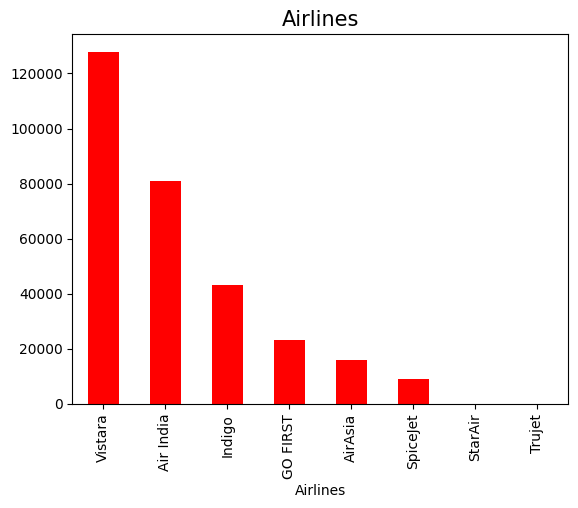

In [42]:
# checking what are the values for each category in airline feature
df["airline"].value_counts().plot(kind = "bar",cmap='flag')
plt.title('Airlines',fontsize=15)
plt.xlabel('Airlines')
plt.show()

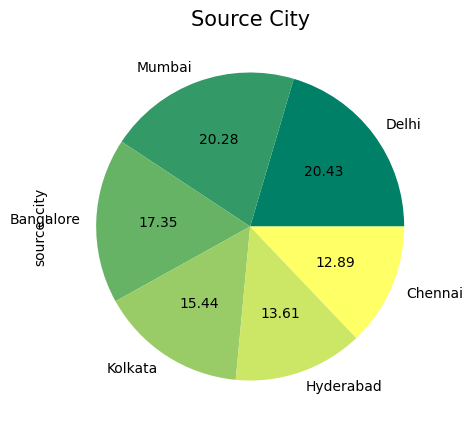

In [43]:
# # checking what are the percentage values for each category in source_city
plt.figure(figsize = (5,5))
df['source_city'].value_counts().plot(kind = "pie", textprops={'color':'black'}, autopct = "%.2f",cmap = "summer" )
plt.title('Source City',fontsize=15)
plt.show()

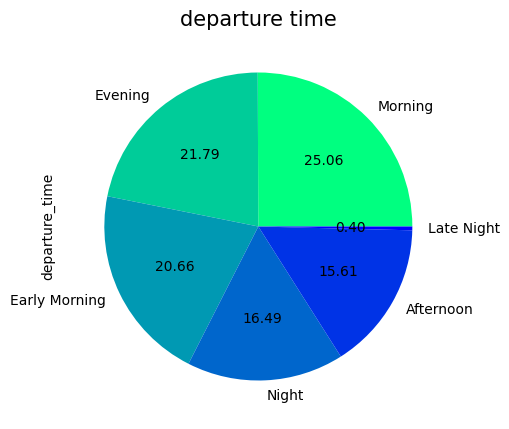

In [44]:
# checking what are the percentage values for each category in departure time
plt.figure(figsize = (5,5))
df['departure_time'].value_counts().plot(kind = "pie",autopct = "%.2f",cmap = "winter_r" )
plt.title('departure time',fontsize=15)
plt.show()

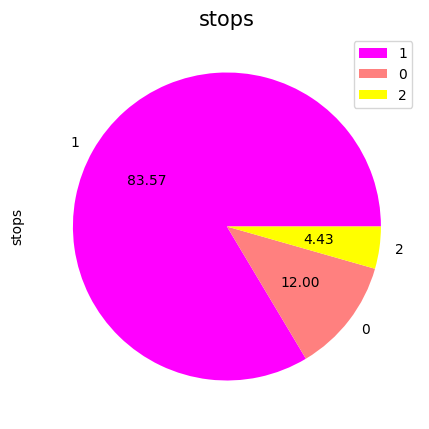

In [45]:
# checking what are the percentage values for each category in stops feature
plt.figure(figsize = (5,5))
df['stops'].value_counts().plot(kind = "pie", textprops={'color':'black'}, autopct = "%.2f",cmap = "spring" )
plt.title('stops',fontsize=15)
plt.legend([1,0,2])
plt.show()

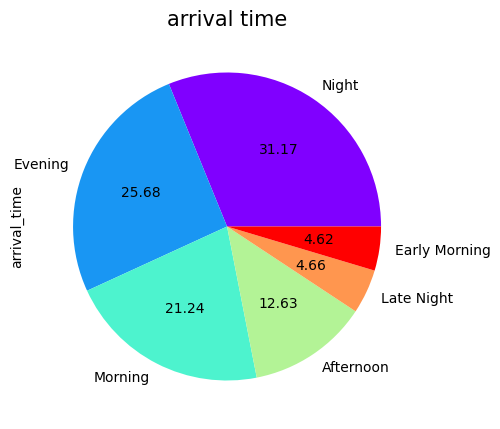

In [46]:
# checking what are the percentage values for each category in arrival time feature
plt.figure(figsize = (5,5))
df['arrival_time'].value_counts().plot(kind = "pie",autopct = "%.2f",cmap = "rainbow" )
plt.title('arrival time',fontsize=15)
plt.show()

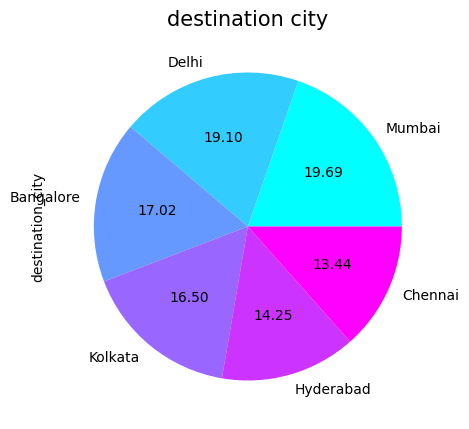

In [47]:
# checking what are the percentage values for each category in destination city feature
plt.figure(figsize = (5,5))
df['destination_city'].value_counts().plot(kind = "pie",autopct = "%.2f",cmap = "cool" )
plt.title('destination city',fontsize=15)
plt.show()

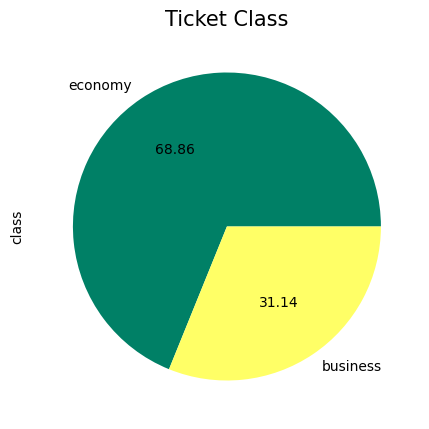

In [48]:
# checking what are the percentage values for each category in ticket class feature
plt.figure(figsize = (5,5))
df['class'].value_counts().plot(kind = "pie",autopct = "%.2f",cmap = "summer" )
plt.title('Ticket Class',fontsize=15)
plt.show()

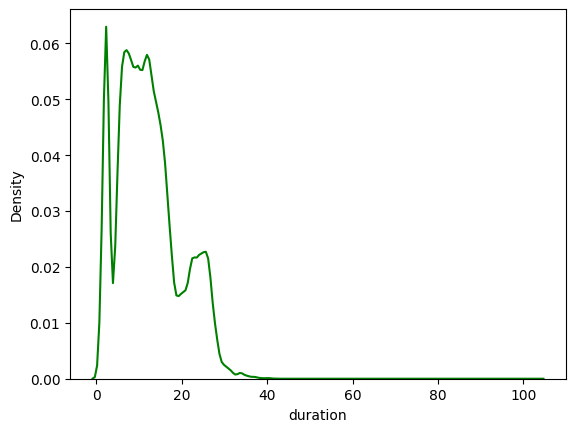

In [49]:
# checking distribution of the duration 
sns.distplot(df["duration"],hist = False,color = "green")
plt.show()

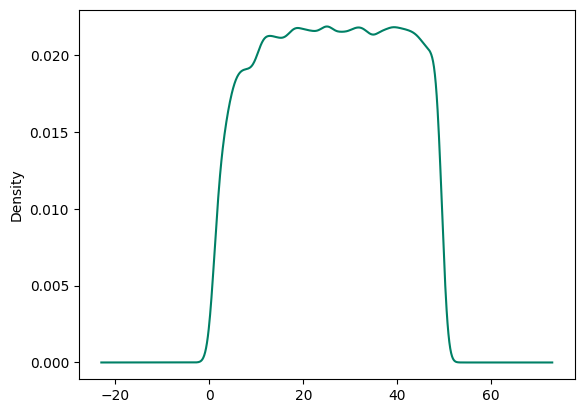

In [50]:
# checking distribution of the days
df["days_left"].plot(kind = "kde", cmap = "summer")
plt.show()

##### Q1. Does price vary with Airlines?
###### Ans: The answer is yes Trujet is the cheapest airline and Vistara is the most expansive one.

In [51]:
#s = df.groupby("airline")["price"].mean().sort_values()
s.plot(kind = "barh",cmap = "winter_r")
plt.ylabel("AIRLINE")
plt.xlabel("AVG PRICE")
plt.title("AVERAGE PRICE OF EACH AIRLINE")
plt.show()


NameError: name 's' is not defined

##### Q2. How is the price affected when tickets are bought in just 1 or 2 days before departure?¶
##### Ans: Yes price is affected when tickets are bought in just 1 or 2 days before##### 

In [ ]:
#plt.figure(figsize = (15,5))
s = df.groupby(["days_left"])["price"].max().sort_values()
s.plot(kind = "bar",cmap = "winter_r")
plt.ylabel("AVG PRICE")
plt.xlabel("DAYS BEFORE DEPARTURE")
plt.title("AVERAGE PRICE ON THE BASIS OF DAYS BEFORE DEPARTURE ")
plt.show()

##### Q3. Does ticket price change based on the departure time and arrival time?
##### Ans: 1. departure vs ticket price

##### Ticket Price is More for the Flights when the Departure Time is at Night

##### Ticket Price is almost equal for flights Having Departure time at Early_morning , Morning and Evening

##### Ticket Price is Low for the Flights Having Departure Time at Late_night

##### 2. Arrival Time Vs Ticket Price

##### Ticket Price is More for the Flights when the Arrival Time is at Evening

##### Ticket Price is almost equal for flights Having Arrival time is at Morning and Night

###### Ticket Price is Low for the Flights Having Arrival Time at Late_night as same as Departure Time

In [ ]:
sns.catplot(x='arrival_time',y='price',kind='strip',data=df,color = "c",aspect = 2)

In [ ]:
sns.catplot(x='departure_time',y='price',kind='strip',data=df,color = "c",aspect = 2)

#### Q4. How the price changes with change in Source and Destination?
#### Ans: 1. Source City Vs Ticket Price

#### Ticket Price is More for the Flights whose Source City is Kolkata

#### Ticket Price is almost equal for flights Having Source Cities as Mumbai and chennai , delhi and Bangalore

#### Ticket Price is Low for the Flights Having Source City as Hydrabad

#### 2. Destination City Vs Ticket Price

#### Ticket Price is More for the Flights whose Destination City is kolkata and Delhi

#### Ticket Price is almost equal for flights Having Destination Cities as Mumbai and Bangalore

#### Ticket Price is Low for the Flights Having Destination City as Chennai 

In [ ]:
sns.catplot(x='source_city',y='price',kind='strip',data=df,color = "y",aspect = 2)

In [ ]:
sns.catplot(x='destination_city',y='price',kind='strip',data=df,color = "g",aspect = 2)

In [ ]:
# The price variation between source and destination in each airline
df.groupby(['airline','source_city','destination_city'],as_index=False)['price'].mean()

In [ ]:
# here is the average price between city 
pd.pivot_table(data = df,columns = "source_city",index = "destination_city", values = "price")

In [ ]:
# Plotting the information regarding price variance between cities
_ = pd.crosstab(columns = df["source_city"],index = df["destination_city"], values = df["price"], aggfunc="mean")
_.plot(kind = "bar",figsize = (15,5))

In [ ]:
# we can plot strip plot to look at the price variation in between cities
sns.catplot(data = df, x = "source_city", y = "price", 
            hue = "destination_city", jitter = 0.3, aspect = 2,height = 7)

#### Q5. How does the ticket price vary between Economy and Business class?¶
#### Ans: The business class price is higher than economy class

In [ ]:
sns.catplot(data = df, x = "class", y = "price", aspect = 1,height = 5)

In [ ]:
sns.catplot(data = df, x = "airline", y = "price", 
            hue = "class", jitter = 0.2, aspect = 2,height = 5)

In [ ]:
#  We can see that we have outliers in duration feature but we will not replace them
#  in place of replacing them we will reduce their effect as it is 
#  the real time, which is taken by flight from source and destination
df.boxplot(column ="duration")

In [ ]:
df.boxplot(column ="days_left") # no outliers are found

<div style="background-color: orange; padding: 10px; text-align: center;">
    
<h1 style="font-weight: bold; font-style: italic;">FEATURE ENGINEERING</h1>
    
</div>



In [55]:
# dropping the duplicate rows
df.drop_duplicates(inplace = True)

In [56]:
#as we have seen that we are getting information from airline so we have no need for flight feature
df1 = df.drop("flight", axis = 1)
df1.head(1)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,economy,2.17,1,5953


In [57]:
df1["departure_time"].replace({'Late Night':0,'Early Morning':1,'Morning':2,
                               'Afternoon':3,'Evening':4,'Night':5},inplace=True)
df1["arrival_time"].replace({'Late Night':0,'Early Morning':1,'Morning':2,
                             'Afternoon':3,'Evening':4,'Night':5},inplace=True)
df1["class"].replace({"economy":0,"business":1},inplace=True)
df1.head(3)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,4,0,5,Mumbai,0,2.17,1,5953
1,SpiceJet,Delhi,1,0,2,Mumbai,0,2.33,1,5953
2,AirAsia,Delhi,1,0,1,Mumbai,0,2.17,1,5956


In [58]:
# encoding for nominal data (we will use onehot encoder)

ohe = OneHotEncoder()
df1[list(df1["airline"].unique())] = ohe.fit_transform(df1[["airline"]]).A 
# making sparse metrics to metrics
df1 = pd.concat([df1,pd.get_dummies(df1["destination_city"],prefix = "destination_city")], axis = 1)
df1 = pd.concat([df1,pd.get_dummies(df1["source_city"],prefix = "source_city")], axis = 1)
df1.drop(["airline","source_city","destination_city"],axis = 1,inplace=True)
df1.head(1)

,departure_time,stops,arrival_time,class,duration,days_left,price,SpiceJet,AirAsia,Vistara,...,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,source_city_Bangalore,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai
0,4,0,5,0,2.17,1,5953,0.0,0.0,0.0,...,0,0,0,1,0,0,1,0,0,0


<div style="background-color: orange; padding: 10px; text-align: center;">
    
<h1 style="font-weight: bold; font-style: italic;">FEATURE SELECTION</h1>
    
</div>


In [59]:
# As we can see there is low dimentionality of the data no need for high feature selections
# if we will drop some featuers so there is high chances that our model will be undercutted. 
# That's why we will see the model perfomance without feature selection first.

<div style="background-color: orange; padding: 10px; text-align: center;">
    
<h1 style="font-weight: bold; font-style: italic;">MODEL SELECTION AND TRAINING</h1>
    
</div>



In [60]:
# seperating the dependent and independent variables
x = df1.drop("price", axis = 1)
y = df1["price"]

In [61]:
# splitting the data for training as well as testing purpose
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

<div style="background-color: orange; padding: 10px; text-align: center;">
    
<h1 style="font-weight: bold; font-style: italic;">MODEL BUILDING</h1>
    
</div>


In [62]:
models={
    'LinearRegression':LinearRegression(),
    'Decision Tree':DecisionTreeRegressor(),
    'AdaBoostRegressor':AdaBoostRegressor(),
    'RandomForestRegressor':RandomForestRegressor(random_state=0)
    
}

<div style="background-color: orange; padding: 10px; text-align: center;">
    
<h1 style="font-weight: bold; font-style: italic;">WITHOUT SCALING MODEL PERFORMANCES</h1>
    
</div>


In [63]:
for name, model in models.items():
    model.fit(x_train, y_train)
    print('Performance of model trained without scaling using {}'.format(name))
    training_score = model.score(x_train, y_train)*100
    testing_score= model.score(x_test,y_test)*100
    score =r2_score(y_test,model.predict(x_test))*100
    mae = mean_absolute_error(y_test,model.predict(x_test))
    mse=mean_squared_error(y_test,model.predict(x_test))
    rmse=np.sqrt(mse)
    print("r2score",score)
    print("training_score:",training_score)
    print("testing_score:",testing_score)
    print("mae:",mae)
    print("mse:",mse)
    print("rmse_test",rmse)
    print("*"*100)

Performance of model trained without scaling using LinearRegression
r2score 91.01065276667426
training_score: 90.93493429288637
testing_score: 91.01065276667426
mae: 4516.325269717395
mse: 46308872.30654299
rmse_test 6805.062255890316
****************************************************************************************************
Performance of model trained without scaling using Decision Tree
r2score 97.63981288668975
training_score: 99.9382532773985
testing_score: 97.63981288668975
mae: 1182.4025711671343
mse: 12158569.561607255
rmse_test 3486.914045629352
****************************************************************************************************
Performance of model trained without scaling using AdaBoostRegressor
r2score 93.24034250879167
training_score: 93.24117839191717
testing_score: 93.24034250879167
mae: 3801.1754292992173
mse: 34822563.58235281
rmse_test 5901.0646143177255
********************************************************************************************

In [66]:
# scalling the data 
# to skip data leackage we will fit only on training data 
std = StandardScaler()
x_train = pd.DataFrame(std.fit_transform(x_train), columns = x_train.columns)
x_test = pd.DataFrame(std.transform(x_test),columns = x_test.columns)

<div style="background-color: orange; padding: 10px; text-align: center;">
    
<h1 style="font-weight: bold; font-style: italic;">WITH SCALING MODEL PERFORMANCES</h1>
    
</div>


In [67]:
for name, model in models.items():
    model.fit(x_train, y_train)
    print('Performance of model trained with scaling using {}'.format(name))
    training_score = model.score(x_train, y_train)*100
    testing_score= model.score(x_test,y_test)*100
    score =r2_score(y_test,model.predict(x_test))*100
    mae = mean_absolute_error(y_test,model.predict(x_test))
    mse=mean_squared_error(y_test,model.predict(x_test))
    rmse=np.sqrt(mse)
    print("r2score",score)
    print("training_score:",training_score)
    print("testing_score:",testing_score)
    print("mae:",mae)
    print("mse:",mse)
    print("rmse_test",rmse)
    print("*"*100)

Performance of model trained with scaling using LinearRegression
r2score 91.01064118615369
training_score: 90.93485405467497
testing_score: 91.01064118615369
mae: 4518.230322937707
mse: 46308931.96391671
rmse_test 6805.06663919735
****************************************************************************************************
Performance of model trained with scaling using Decision Tree
r2score 97.65908914085716
training_score: 99.9382532773985
testing_score: 97.65908914085716
mae: 1175.2366731929837
mse: 12059267.40210468
rmse_test 3472.6455912034385
****************************************************************************************************
Performance of model trained with scaling using AdaBoostRegressor
r2score 93.45284097216286
training_score: 93.4823260447052
testing_score: 93.45284097216286
mae: 3715.344344359685
mse: 33727871.837760784
rmse_test 5807.570218065451
****************************************************************************************************
Per

##### as we can see the random forest has good r2 values at the time of training as well as testing also has lowest %mae. so we will go with the random forest model. NO need to optimise model

<div style="background-color: orange; padding: 10px; text-align: center;">
    
<h1 style="font-weight: bold; font-style: italic;">Model Training</h1>
    
</div>


In [69]:
# Training the model
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

<div style="background-color: orange; padding: 10px; text-align: center;">
    
<h1 style="font-weight: bold; font-style: italic;">Evaluation</h1>
    
</div>


In [70]:
# predicting the values
y_pred = rf.predict(x_test)
y_pred

array([35016.64, 38137.75, 11068.82, ...,  1604.  , 10812.34, 64053.16])

In [73]:
r2     = r2_score(y_test,y_pred)
mape    = mean_absolute_percentage_error(y_test,y_pred)
print(f"The Performace of the model::\nR2_score: {r2}\n%MAE: {mape}")

The Performace of the model::
R2_score: 0.9852316475473487
%MAE: 0.07289272794239489


#### We can see the goodness of best fit line is 98%, which is quite acceptable. 

In [74]:
PREDICTION= pd.DataFrame(zip(y,y_pred),columns=('ACTUAL','PREDICTED'),dtype=float)

In [76]:
PREDICTION

,ACTUAL,PREDICTED
0,5953.0,35016.64
1,5953.0,38137.75
2,5956.0,11068.82
3,5955.0,3995.11
4,5955.0,8681.12
...,...,...
99081,7212.0,53164.00
99082,7212.0,52287.00
99083,7212.0,1604.00
99084,7228.0,10812.34


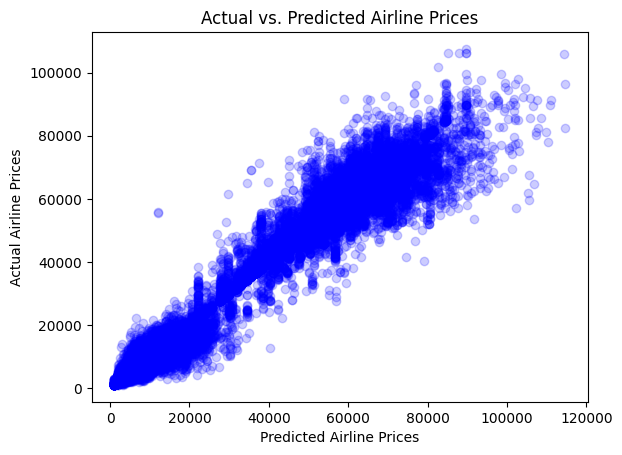

In [83]:
plt.scatter(y_test,y_pred,alpha =0.2,color="Blue")
plt.title('Actual vs. Predicted Airline Prices')
plt.xlabel('Predicted Airline Prices')
plt.ylabel('Actual Airline Prices');